# Visualization of English Premier League Matchday Squads

In [1]:
__author__ = "whackadoodle"

%matplotlib inline

import sqlite3
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.misc import imread
import scipy.ndimage

Establish connection to the sqlite database

In [2]:
database = "database.sqlite"
conn = sqlite3.connect(database)

query = "SELECT name FROM sqlite_master WHERE type='table';"
pd.read_sql(query, conn)

,name
0,Country
1,sqlite_sequence
2,League
3,Match
4,Player
5,Player_Stats
6,Team


### League Dataframe

In [3]:
query = "SELECT * FROM League;"
league_df = pd.read_sql(query, conn)
league_df.columns
league_df

,id,country_id,name
0,1,1,Belgium Jupiler League
1,1729,1729,England Premier League
2,4735,4735,France Ligue 1
3,7775,7775,Germany 1. Bundesliga
4,10223,10223,Italy Serie A
5,13240,13240,Netherlands Eredivisie
6,15688,15688,Poland Ekstraklasa
7,17608,17608,Portugal Liga ZON Sagres
8,19660,19660,Scotland Premier League
9,21484,21484,Spain LIGA BBVA


### Team Dataframe

In [4]:
query = "SELECT * FROM Team;"
team_df = pd.read_sql(query, conn)
team_df.columns.values

array(['id', 'team_api_id', 'team_long_name', 'team_short_name'], dtype=object)

### Player Dataframe

In [5]:
query = "SELECT * FROM Player;"
player_df = pd.read_sql(query, conn)
player_df.columns.values

array(['id', 'player_api_id', 'player_name', 'player_fifa_api_id',
       'birthday', 'height', 'weight'], dtype=object)

### Match Dataframe

In [6]:
#Query the match details only from the English Premier League
query = "SELECT * FROM Match WHERE league_id=1729;"
match_df = pd.read_sql(query, conn)
print match_df.columns.values
#print match_df.head(10)

#Drop the rows which do not have player coordinates
match_df = match_df[match_df['home_player_X3'].notnull()]

#Position of the GK is set to (1,1) in the dataset which is incorrect
match_df['home_player_X1'] = 5
match_df['home_player_Y1'] = 0
match_df['away_player_X1'] = 5
match_df['away_player_Y1'] = 0

['id' 'country_id' 'league_id' 'season' 'stage' 'date' 'match_api_id'
 'home_team_api_id' 'away_team_api_id' 'home_team_goal' 'away_team_goal'
 'home_player_X1' 'home_player_X2' 'home_player_X3' 'home_player_X4'
 'home_player_X5' 'home_player_X6' 'home_player_X7' 'home_player_X8'
 'home_player_X9' 'home_player_X10' 'home_player_X11' 'away_player_X1'
 'away_player_X2' 'away_player_X3' 'away_player_X4' 'away_player_X5'
 'away_player_X6' 'away_player_X7' 'away_player_X8' 'away_player_X9'
 'away_player_X10' 'away_player_X11' 'home_player_Y1' 'home_player_Y2'
 'home_player_Y3' 'home_player_Y4' 'home_player_Y5' 'home_player_Y6'
 'home_player_Y7' 'home_player_Y8' 'home_player_Y9' 'home_player_Y10'
 'home_player_Y11' 'away_player_Y1' 'away_player_Y2' 'away_player_Y3'
 'away_player_Y4' 'away_player_Y5' 'away_player_Y6' 'away_player_Y7'
 'away_player_Y8' 'away_player_Y9' 'away_player_Y10' 'away_player_Y11'
 'home_player_1' 'home_player_2' 'home_player_3' 'home_player_4'
 'home_player_5' 'home_pl

## Matchday Squads

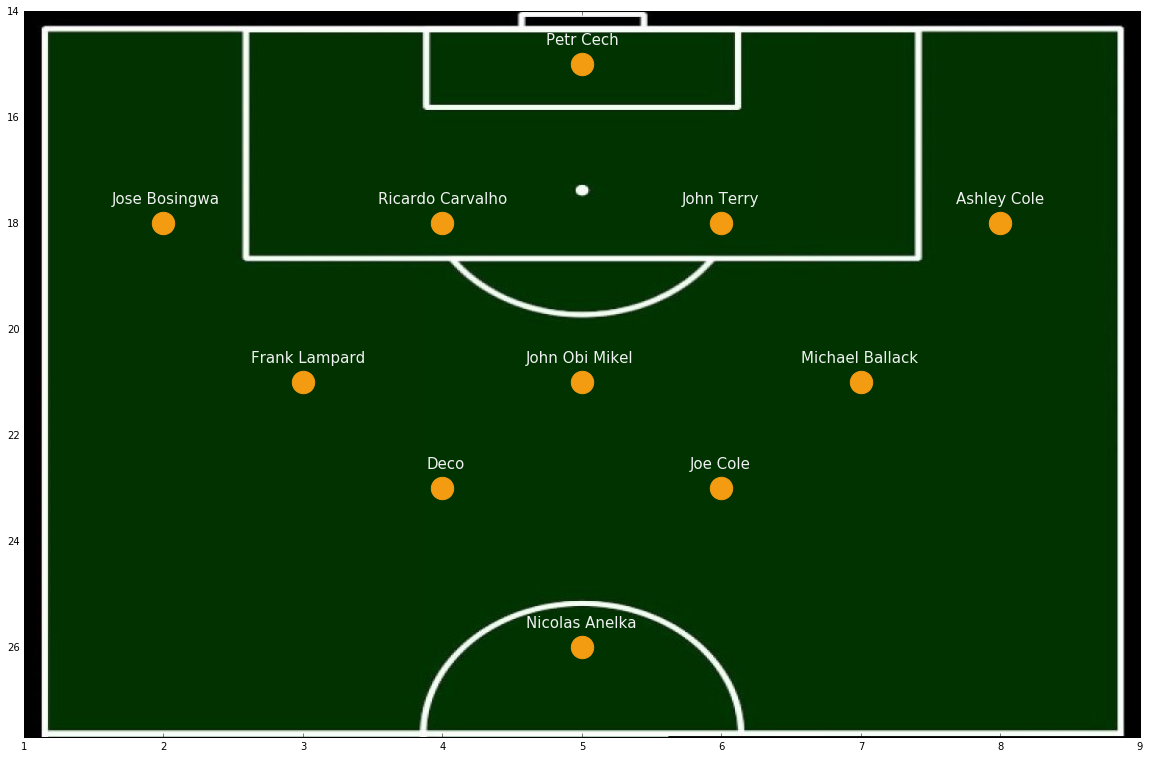

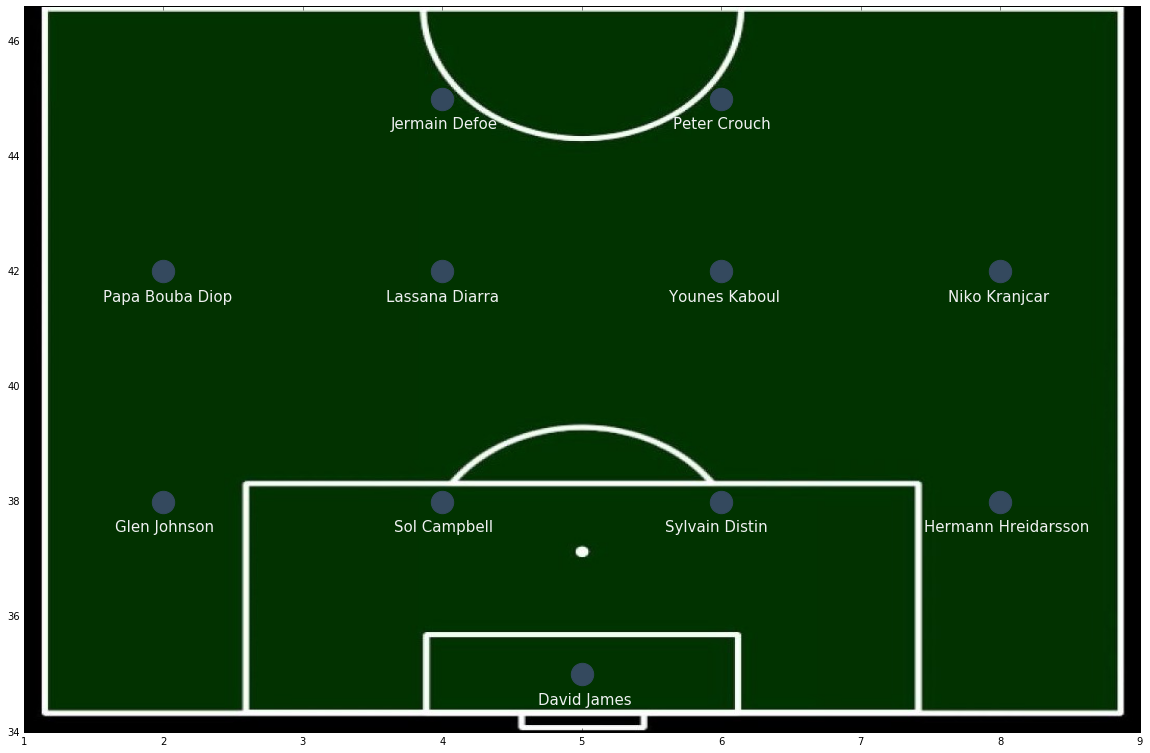

In [7]:
match_df = match_df[match_df['match_api_id'] == 489051]

home_x_coordinates, home_y_coordinates = [], []
away_x_coordinates, away_y_coordinates = [], []
home_players, away_players = [], []

#Obtain the coordinates to denote each player's position on the field
for i in range(1,12):
    home_player_x_coordinate = 'home_player_X%d' % i
    home_player_y_coordinate = 'home_player_Y%d' % i
    away_player_x_coordinate = 'away_player_X%d' % i
    away_player_y_coordinate = 'away_player_Y%d' % i

    home_x_coordinates.append(match_df[home_player_x_coordinate].iloc[0])
    home_y_coordinates.append((match_df[home_player_y_coordinate].iloc[0] + 15))
    away_x_coordinates.append(match_df[away_player_x_coordinate].iloc[0])
    away_y_coordinates.append((match_df[away_player_y_coordinate].iloc[0] + 35))
    
    #Obtain the players' names
    query = "SELECT player_name FROM Player where player_api_id = " + str(match_df['home_player_%d' % i].iloc[0]) +";"
    home_players.append(pd.read_sql(query, conn).iloc[0]['player_name'])
    query = "SELECT player_name FROM Player where player_api_id = " + str(match_df['away_player_%d' % i].iloc[0]) +";"
    away_players.append(pd.read_sql(query, conn).iloc[0]['player_name'])

#Home team in Yellow
plt.figure(figsize=(20,13))
for label, x, y in zip(home_players, home_x_coordinates, home_y_coordinates):
    plt.annotate(
        label,
        xy = (x, y), xytext = (len(label)*-4, 20),
        textcoords = 'offset points',
        fontsize= 15,
        color = '#F2F3F4'
    )
#Background field image
img = imread('pitch1.jpg')
plt.scatter(home_x_coordinates, home_y_coordinates, s = 500, color = '#F39C12', zorder = 2)
plt.imshow(scipy.ndimage.rotate(img, 270), zorder = 1, extent=[min(home_x_coordinates)-1,max(home_x_coordinates)+1,min(home_y_coordinates)-1,max(home_y_coordinates)+1.7], aspect = 'auto')
plt.gca().invert_yaxis() # Invert y axis to start with the goalkeeper at the top


#Away team in Black
plt.figure(figsize=(20, 13))
plt.gca().invert_xaxis() # Invert x axis to have right wingers on the right
for label, x, y in zip(away_players, away_x_coordinates, away_y_coordinates):
    plt.annotate(
        label,
        xy = (x, y), xytext = (len(label)*-4, -30),
        textcoords = 'offset points',
        fontsize= 15,
        color = '#F2F3F4'
    )
img = imread('pitch1.jpg')
plt.scatter(away_x_coordinates, away_y_coordinates, s = 500, color = '#34495E', zorder = 2)
plt.imshow(scipy.ndimage.rotate(img, -90), zorder = 1, extent=[min(away_x_coordinates)-1,max(away_x_coordinates)+1,min(away_y_coordinates)-1,max(away_y_coordinates)+1.6], aspect = 'auto')
plt.show()
